In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import base

LAST_N = 15

In [2]:
def get_success_and_fail_numbers_at_each_task():
    grouped_users =  base.get_dataset_and_group_by_user()
    number_of_target_fails_top = {}
    number_of_target_success_top = {}
    number_of_target_fails_som = {}
    number_of_target_success_som = {}
    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            if not target in number_of_target_fails_top.keys():
                number_of_target_fails_top[target] = 0
                number_of_target_success_top[target] = 0
                number_of_target_fails_som[target] = 0
                number_of_target_success_som[target] = 0
            if target_group.iloc[0]["display_type"] == "top":
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    number_of_target_fails_top[target] += 1
                else:
                    number_of_target_success_top[target]+=1
            else:
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    number_of_target_fails_som[target] += 1
                else:
                    number_of_target_success_som[target]+=1

    return number_of_target_success_top,number_of_target_fails_top, \
           number_of_target_success_som,number_of_target_fails_som


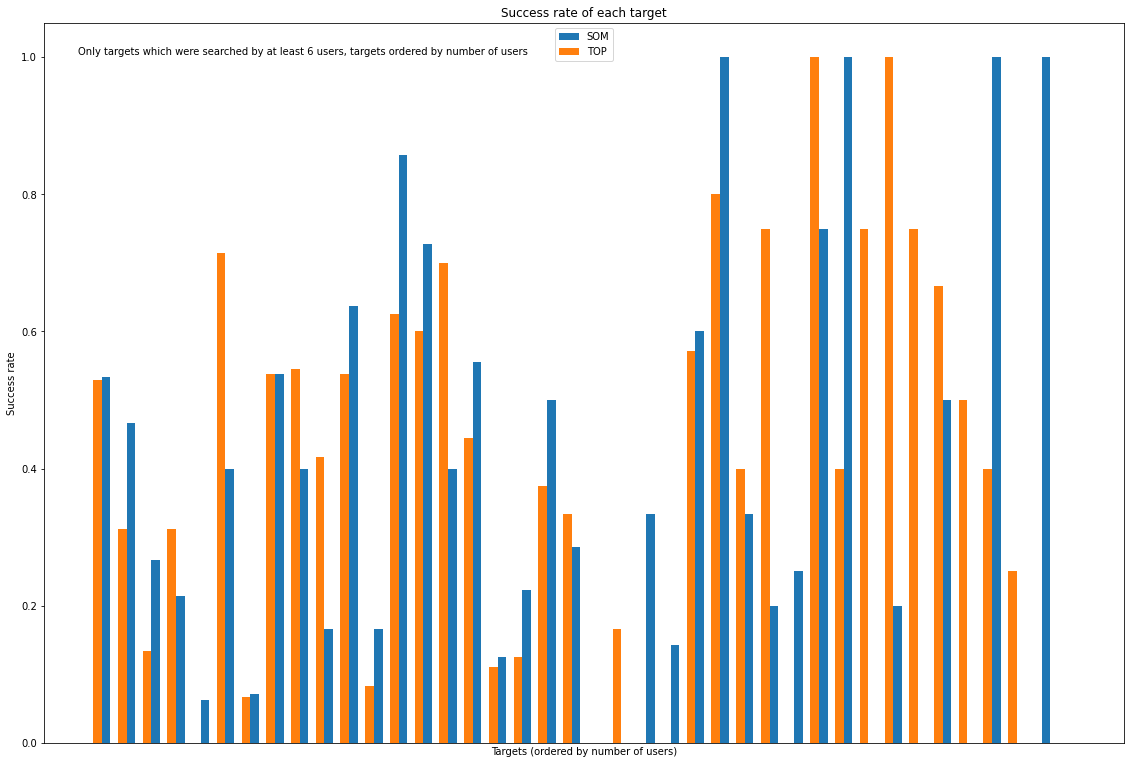

<Figure size 1440x1440 with 0 Axes>

In [3]:
%matplotlib inline
fig, ax = plt.subplots()

success_top, fail_top, success_som, fail_som = get_success_and_fail_numbers_at_each_task()
x = []
y1 = []
y2 = []
i = 0
prev = 100000
sort = {}
for target, _ in success_som.items():
    sort[target] = fail_top[target] + success_top[target] + fail_som[target] + success_som[target]
for target, _ in {k: v for k, v in sorted(sort.items(), key=lambda item: item[1], reverse=True)}.items():
    if fail_top[target]+success_top[target]+ fail_som[target] + success_som[target] < 6:
        continue
    if fail_top[target]+success_top[target] + fail_som[target] + success_som[target] > prev:
        raise ValueError("Targets are not sorted in order from most frequent!")
    prev = fail_top[target]+success_top[target]+ fail_som[target] + success_som[target]
    x.append(i)
    i += 1
    if (fail_top[target] + success_top[target]) != 0:
        y1.append(fail_top[target] / (fail_top[target] + success_top[target]))
    else:
        y1.append(0)
    if (fail_som[target] + success_som[target]) != 0:
        y2.append(fail_som[target] / (fail_som[target] + success_som[target]))
    else:
        y2.append(0)
width = 0.35
x = np.asarray(x, dtype=np.float32)
plt.bar(x + width/2, y2,width, label='SOM')
plt.bar(x - width/2, y1, width, label='TOP')
plt.legend(loc="upper center")
plt.figtext(0.6, 2.4, 'Only targets which were searched by at least 6 users, targets ordered by number of users', ha='center', va='center')
plt.title("Success rate of each target")
plt.ylabel("Success rate")
plt.xlabel("Targets (ordered by number of users)")
# hide x-ticks
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labelbottom=False)

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()

In [4]:
# this feels a bit messy, let's try order the targets by success (let's choose for example 
# TOP success) and select only first 15 targets 

In [5]:
def get_success_and_fail_numbers_at_first_15_tasks():
    grouped_users =  base.get_dataset_and_group_by_user()
    number_of_target_fails_top = {}
    number_of_target_success_top = {}
    number_of_target_fails_som = {}
    number_of_target_success_som = {}
    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        # filter out not_used targets
        most_searched_targets = pd.read_csv('targets.csv', sep='\,', header=None).iloc[3:3+LAST_N]
        group = group[group['target_id'].isin(most_searched_targets[0].to_list())]
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            if not target in number_of_target_fails_top.keys():
                number_of_target_fails_top[target] = 0
                number_of_target_success_top[target] = 0
                number_of_target_fails_som[target] = 0
                number_of_target_success_som[target] = 0
            if target_group.iloc[0]["display_type"] == "top":
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    number_of_target_fails_top[target] += 1
                else:
                    number_of_target_success_top[target]+=1
            else:
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    number_of_target_fails_som[target] += 1
                else:
                    number_of_target_success_som[target]+=1

    return number_of_target_success_top,number_of_target_fails_top, \
           number_of_target_success_som,number_of_target_fails_som


/home/vit/.local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


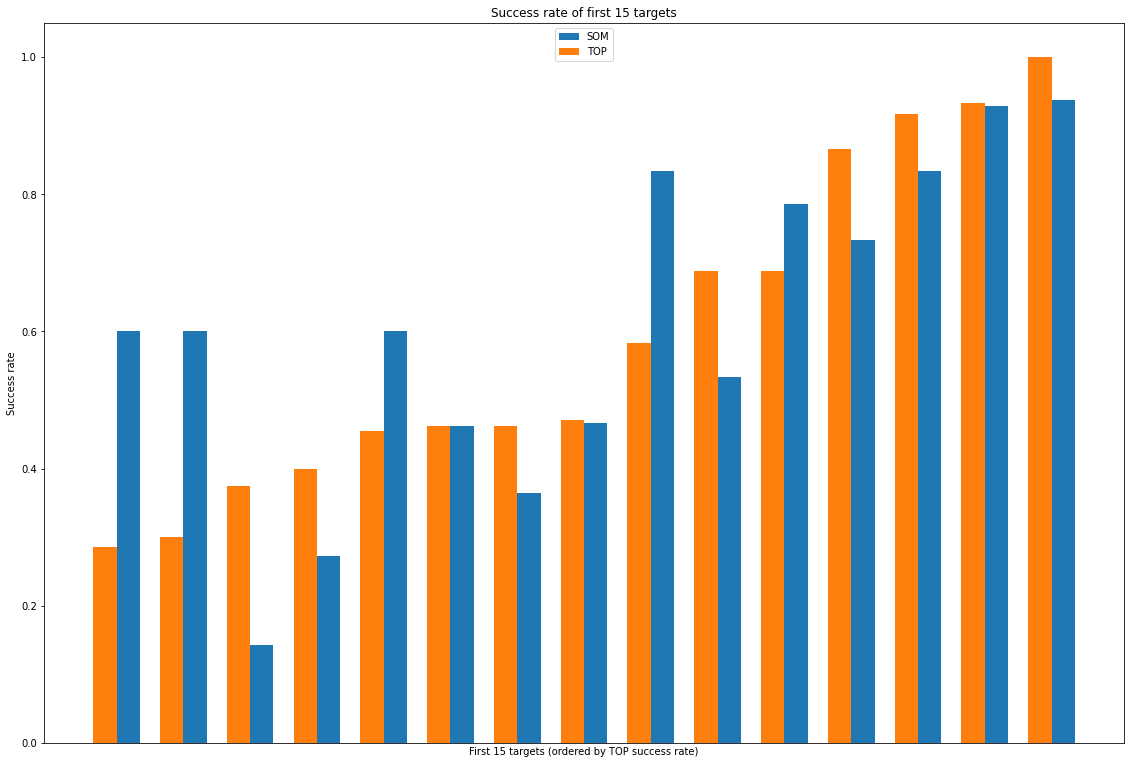

<Figure size 1440x1440 with 0 Axes>

In [6]:
%matplotlib inline
fig, ax = plt.subplots()

success_top, fail_top, success_som, fail_som = get_success_and_fail_numbers_at_first_15_tasks()
x = []
y1 = []
y2 = []
for index, value in fail_top.items():
    x.append(index)
    y1.append(success_top[index] / (success_top[index] + fail_top[index]))
for index in x:
    y2.append(success_som[index] / (success_som[index] + fail_som[index]))

y12 = list(zip(y1, y2))

y12.sort(key=lambda tup: tup[0])

width = 0.35
x = np.asarray(list(range(LAST_N)), dtype=np.float32)
plt.bar(x + width/2, [i[1] for i in y12],width, label='SOM')
plt.bar(x - width/2, [i[0] for i in y12], width, label='TOP')
plt.legend(loc="upper center")
plt.title("Success rate of first 15 targets")
plt.ylabel("Success rate")
plt.xlabel("First 15 targets (ordered by TOP success rate)")

# hide x-ticks
plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labelbottom=False)

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()

In [7]:
# Yay, that's a bit nicer
# Let's add information about number of searches at each bar

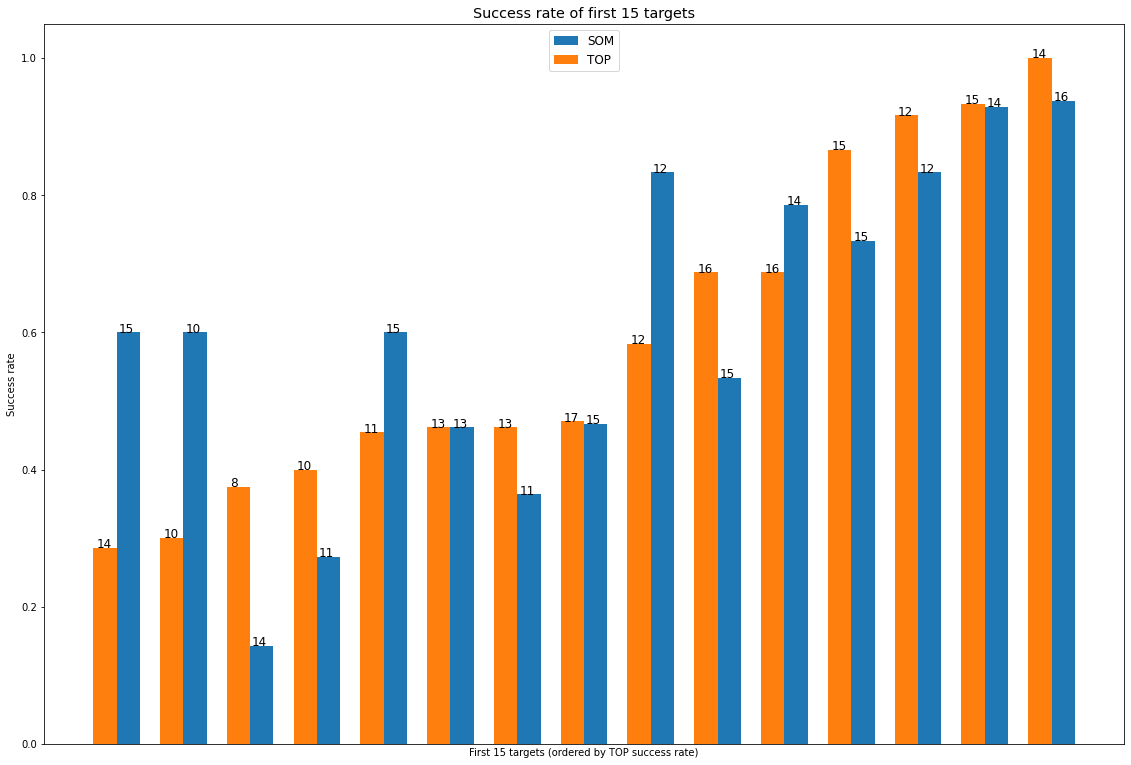

<Figure size 1440x1440 with 0 Axes>

In [8]:
%matplotlib inline
fig, ax = plt.subplots()

success_top, fail_top, success_som, fail_som = get_success_and_fail_numbers_at_first_15_tasks()
x = []
y1 = []
y2 = []
y1_count = []
y2_count = []
for index, value in fail_top.items():
    x.append(index)
    all_top = (success_top[index] + fail_top[index])
    y1.append(success_top[index] / all_top)
    y1_count.append(all_top)
for index in x:
    all_som = (success_som[index] + fail_som[index])
    y2.append(success_som[index] / all_som)
    y2_count.append(all_som)

y12 = list(zip(y1, y2, y1_count, y2_count))

y12.sort(key=lambda tup: tup[0])

width = 0.35
x = np.asarray(list(range(LAST_N)), dtype=np.float32)
plt.bar(x + width/2, [i[1] for i in y12],width, label='SOM')
plt.bar(x - width/2, [i[0] for i in y12], width, label='TOP')

for i in range(len(y12)):
    plt.rc('font', size=12)
    plt.text(i - 0.3, y12[i][0], y12[i][2])

for i in range(len(y12)):
    plt.rc('font', size=12)
    plt.text(i + 0.03, y12[i][1], y12[i][3])

plt.legend(loc="upper center")
plt.title("Success rate of first 15 targets")
plt.ylabel("Success rate")
plt.xlabel("First 15 targets (ordered by TOP success rate)")


plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom=False,  # ticks along the bottom edge are off
    top=False,  # ticks along the top edge are off
    labelbottom=False)

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()

In [9]:
# Mmm, that's much better

In [10]:
# Last but not least, let's try to make graph, where X-axis equals SOM-succes and Y-axis
# equals TOP-success

In [12]:
def get_success_and_fail_numbers_with_session_lengths_at_first_15_targets():
    grouped_users = base.get_dataset_and_group_by_user()
    number_of_target_fails_top = {}
    number_of_target_success_top = {}
    number_of_target_fails_som = {}
    number_of_target_success_som = {}
    sum_session_lengths_of_target = {}
    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        # filter out not_used targets
        most_searched_targets = pd.read_csv('targets.csv', sep='\,', header=None).iloc[3:3 + LAST_N]
        group = group[group['target_id'].isin(most_searched_targets[0].to_list())]
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            if not target in number_of_target_fails_top.keys():
                number_of_target_fails_top[target] = 0
                number_of_target_success_top[target] = 0
                number_of_target_fails_som[target] = 0
                number_of_target_success_som[target] = 0
                sum_session_lengths_of_target[target] = 0
            if target_group.iloc[0]["display_type"] == "top":
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    number_of_target_fails_top[target] += 1
                else:
                    number_of_target_success_top[target] += 1
            else:
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    number_of_target_fails_som[target] += 1
                else:
                    number_of_target_success_som[target] += 1
            sum_session_lengths_of_target[target] += target_group.shape[0]

    return number_of_target_success_top, number_of_target_fails_top, \
           number_of_target_success_som, number_of_target_fails_som, sum_session_lengths_of_target

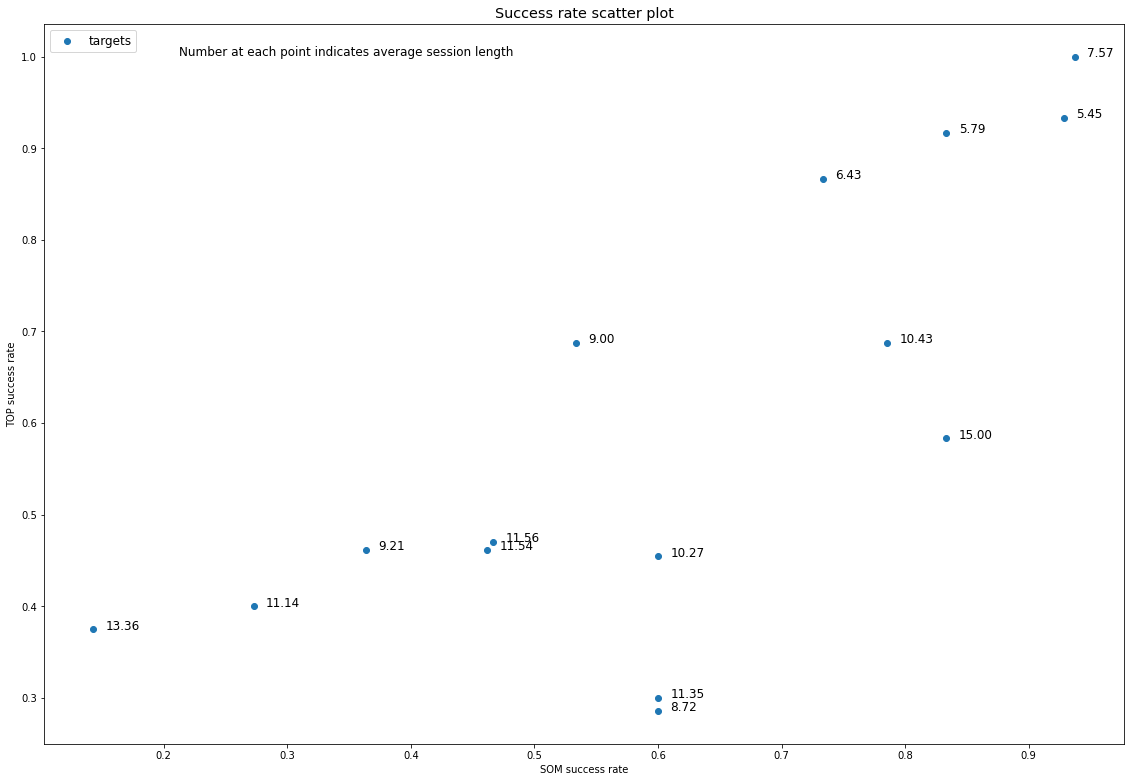

<Figure size 1440x1440 with 0 Axes>

In [18]:
%matplotlib inline
fig, ax = plt.subplots()

success_top, fail_top, success_som, fail_som, sum_session_lengths_of_target = get_success_and_fail_numbers_with_session_lengths_at_first_15_targets()
targets = []
x_som = []
y_top = []
session_mean_length_of_target = []

for index, value in fail_top.items():
    targets.append(index)
    y_top.append(success_top[index] / (success_top[index] + fail_top[index]))
for index in targets:
    x_som.append(success_som[index] / (success_som[index] + fail_som[index]))
    session_mean_length_of_target.append(sum_session_lengths_of_target[index] / (success_top[index] +
                                                                                 success_som[index] +
                                                                                 fail_top[index] +
                                                                                 fail_som[index]))

# print number of entries (failure)
for i in range(len(session_mean_length_of_target)):
    plt.rc('font', size=12)
    plt.text(x_som[i] + 0.01, y_top[i], "{:.2f}".format(session_mean_length_of_target[i]))

plt.figtext(0.7, 2.4, 'Number at each point indicates average session length', ha='center', va='center')

plt.scatter(x_som, y_top, label="targets")
plt.legend(loc="upper left")
plt.title("Success rate scatter plot")
plt.xlabel('SOM success rate')
plt.ylabel('TOP success rate')

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()